In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from jpstock import JpStock
from sklearn.ensemble import RandomForestClassifier

In [2]:
code_TYO = '3041'
start_date = '2015-01-01'
end_date = '2019-08-30'

In [3]:
stock = JpStock.get(code=code_TYO, start=start_date, end=end_date).dropna()

In [4]:
stock_AdjClose = stock[['Adj Close']]

/Users/syoshida/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


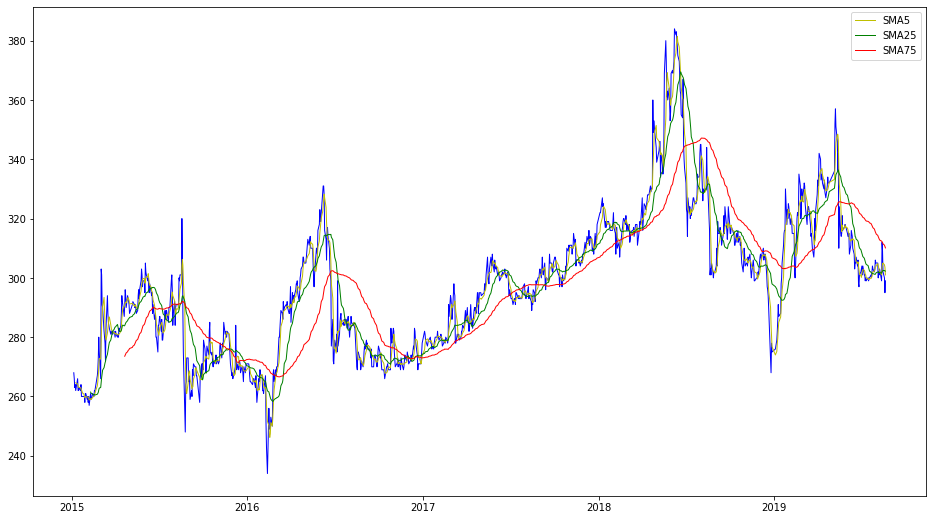

In [5]:
sma75 = pd.DataFrame.rolling(stock_AdjClose, window=75,center=False).mean()
sma25 = pd.DataFrame.rolling(stock_AdjClose, window=25,center=False).mean()
sma5 = pd.DataFrame.rolling(stock_AdjClose, window=5,center=False).mean()

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
x = stock_AdjClose.index
ax.plot(x, stock_AdjClose, color="blue", linewidth=1, linestyle="-")
ax.plot(x, sma5, color="y", linewidth=1, linestyle="-", label="SMA5")
ax.plot(x, sma25, color="g", linewidth=1, linestyle="-", label="SMA25")
ax.plot(x, sma75, color="r", linewidth=1, linestyle="-", label="SMA75")
ax.legend()

In [6]:
etf_list = [

1309,#上海株式指数・上証50連動型上場投資信託
1313,#サムスンKODEX200証券上場指数投資信託
1314,#上場インデックスファンドS&P日本新興株100
1322,#上場インデックスファンド中国A株（パンダ）CSI300
1326,#SPDRゴールド・シェア
1343,#NEXT FUNDS 東証REIT指数連動型上場投信
1543,#純パラジウム上場信託（現物国内保管型）
1548,#上場インデックスファンド中国H株（ハンセン中国企業株）
1551,#JASDAQ-TOP20上場投信
1633,#NEXT FUNDS 不動産（TOPIX-17）上場投信
1678,#NEXT FUNDS インド株式指数・Nifty 50連動型上場投信
1681,#上場インデックスファンド海外新興国株式（MSCIエマージング）
1682,#NEXT FUNDS 日経・東商取白金指数連動型上場投信
1698,#上場インデックスファンド日本高配当（東証配当フォーカス100）

]

In [7]:
code_error = []
for code_etf in etf_list:
    try:
        stock_etf = JpStock.get(code=str(code_etf), start=start_date, end=end_date)
        stock_AdjClose['ETF_%s'%(code_etf)] = stock_etf[['Adj Close']]
    except:
        print(code_etf)
        code_error.append(code_etf)
        
for i in code_error:
    etf_list.remove(i)

xlist = list(map(lambda x: 'ETF_' + str(x), etf_list))
stock_AdjClose.tail()

1309


/Users/syoshida/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


1314


/Users/syoshida/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/syoshida/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/syoshida/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

1548


,Adj Close,ETF_1313,ETF_1322,ETF_1326,ETF_1343,ETF_1543,ETF_1551,ETF_1633,ETF_1678,ETF_1681,ETF_1682,ETF_1698
Date,,,,,,,,,,,,
2019-08-15,309.0,2485.0,5120.0,15150.0,2187.0,45700.0,3805.0,26610.0,147.0,1296.0,147.0,1565.0
2019-08-16,302.0,2384.0,5120.0,15200.0,2214.0,46000.0,3795.0,27160.0,147.0,1283.0,148.0,1554.0
2019-08-19,300.0,2300.0,5190.0,15130.0,2215.0,46100.0,3810.0,27410.0,150.0,1300.0,147.0,1561.0
2019-08-20,295.0,2288.0,5160.0,15030.0,2220.0,46800.0,3850.0,28100.0,148.0,1307.0,147.0,1567.0
2019-08-21,299.0,2270.0,5190.0,15080.0,2210.0,47100.0,3845.0,27950.0,148.0,1303.0,148.0,1562.0


In [8]:
stock_AdjClose.reset_index(inplace = True)

In [9]:
stock_AdjClose = stock_AdjClose.dropna()

df_train = stock_AdjClose.iloc[1:len(stock_AdjClose)-1]
#はじまりを[1:]としているのは、階差系列をとっているため[1]がNaNデータだからです。
#学習データにNaNデータがあると、エラーがでます。

df_test = stock_AdjClose.iloc[len(stock_AdjClose)-1:len(stock_AdjClose)]
#テストデータには、一番最新のデータを入れます。


In [10]:
display(df_train.tail())
display(df_test.tail())

,Date,Adj Close,ETF_1313,ETF_1322,ETF_1326,ETF_1343,ETF_1543,ETF_1551,ETF_1633,ETF_1678,ETF_1681,ETF_1682,ETF_1698
1127,2019-08-14,312.0,2280.0,5210.0,15050.0,2171.0,46700.0,3855.0,26870.0,150.0,1301.0,146.0,1565.0
1128,2019-08-15,309.0,2485.0,5120.0,15150.0,2187.0,45700.0,3805.0,26610.0,147.0,1296.0,147.0,1565.0
1129,2019-08-16,302.0,2384.0,5120.0,15200.0,2214.0,46000.0,3795.0,27160.0,147.0,1283.0,148.0,1554.0
1130,2019-08-19,300.0,2300.0,5190.0,15130.0,2215.0,46100.0,3810.0,27410.0,150.0,1300.0,147.0,1561.0
1131,2019-08-20,295.0,2288.0,5160.0,15030.0,2220.0,46800.0,3850.0,28100.0,148.0,1307.0,147.0,1567.0


,Date,Adj Close,ETF_1313,ETF_1322,ETF_1326,ETF_1343,ETF_1543,ETF_1551,ETF_1633,ETF_1678,ETF_1681,ETF_1682,ETF_1698
1132,2019-08-21,299.0,2270.0,5190.0,15080.0,2210.0,47100.0,3845.0,27950.0,148.0,1303.0,148.0,1562.0


In [11]:
x_train = []
y_train = []
for s in range(0, len(df_train) - 1):
# 	print(df_train["Date"].iloc[s], df_train["Date"].iloc[s + 1])
# 	print(df_train["Adj Close"].iloc[s], df_train["Adj Close"].iloc[s + 1])
#   x_train.append(df_train[xlist].iloc[s])

	x_train.append(((df_train[xlist] - df_train[xlist].min()) / (df_train[xlist].max() - df_train[xlist].min())).iloc[s])

	if df_train["Adj Close"].iloc[s + 1] > df_train["Adj Close"].iloc[s]:
		y_train.append(1)
	else:
		y_train.append(-1)

# print(x_train)
# print(y_train)

rf = RandomForestClassifier(n_estimators=len(x_train), random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=713,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
test_x = df_test[xlist].iloc[0]
test_y = rf.predict(np.array(test_x).reshape(1, -1))

print("result : ", test_y[0])

result :  -1
